# 09 Convolutional Neural Networks
> Before Starting, we will change the accelerator of this notebook from a CPU to a GPU, since we'll be running our Neural Networks on the GPU. 

> Go to Runtime --> Change Runtime Type --> GPU 

Welcome to the 9th session in Practical Machine Learning. In this session, we will continue our journey in Deep Learning. In this session, we will learn about one of the most interesting domains of AI - *Computer Vision*.

![](https://drive.google.com/uc?id=1wYMDn_gWGMeH7OLV3kbO9zlf42f283sF)


Computer Vision is the domain that focuses on Machines' ability to perceive the physical space around us through vision, just like we do through our eyes. Even before there were sophisticated algorithms to perform Computer Vision tasks, the idea and importance of Computer Vision has existed. Vision was one of the key components of the Turing Test. 

It is safe to say that among all Machine Learning tasks, Computer Vision has advanced the most. Every year, we see more and more advanced research in Computer Vision tasks. The most influential conference in AI is CVPR, which stands for *Computer Vision and Pattern Recognition*. 

Computer Vision finds its applications in very sophisticated systems nowadays. Self driving cars, or autonomous robots use Computer Vision. So clearly, Computer Vision cannot be neglected in AI, because we literally let it decide the fate of things as precious as human life!

All this is mostly credited to one single technique in Deep Learning - *Convolutional Neural Networks*. They are a variant of traditional Neural Networks that are capable of handling images as whole. 

So, let us actually begin by building our own model, to see what Convolutional Neural Networks are capable of, and what potential they have. This is the session where we will be learning how to build the best models among all types of models we've built, in terms of performance. 

We'll build our models using PyTorch. However, PyTorch only provides us inbuilt functionality for basic (and frankly slightly archaic) training methods. Instead of plain PyTorch, we recommend using  using a library called *fastai*, which is built on top of PyTorch. We've used fastai in the very Introduction to Python and ML introductory session. *fastai* allows users to implement world class research practices in Deep Learning, without having to deal with all the technical details. Let us begin by installing this library.


In [ ]:
from IPython.display import YouTubeVideo

In [ ]:
!pip install --upgrade fastai >./tmp
from fastai.vision.all import *
#note: If you're using Colab, you may see an erro message about incompatibility. Ignore that!

ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.


Let us revisit the problem of the Cat vs the Dog classifier. However, this time we will not only understand various concepts that you may have ekarng in the preovious. If you don't find such things, thats okay. You are now ready to learn those. We will look at the components that fastai needs to build a model. However you are not required to understand or memorize the internal working of the library at this point. We will guide you on how to build the model. All the steps and documentations can be found [here](https://docs.fast.ai/).

We start by downloading the datasets. *fastai* has the `untar_data` function that automatically downloads the data from a link and unzips it. It returns the paths of the destination where the dataset would be. 


In [ ]:
path = untar_data(URLs.PETS)
path

Path('/root/.fastai/data/oxford-iiit-pet')

So the dataset is contained at this location. *fastai* has a wonderful API that can dynamically retrive data in the form of tensors just by taking in a list of path addresses of all datapoints, and a method to reallocate. 

In [ ]:
files = get_image_files(path/"images")
files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_146.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_3.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_116.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_228.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_24.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_146.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_131.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_43.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_198.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_69.jpg')...]

This dataset contains not only images of Cats and Dogs, but even different breeds. You have the option to either use this as a dataset to classifiy different breeds of cats and dogs, so simply classifiy between cats or dogs. Cats are specifically labeled with words starting with a Capital Letter, while a small letter for dogs. So *fastai* needs to know, how labels of an image with a path, is determined. We do so by defining a function `label_func`.

In [ ]:
def label_func(f): return f[0].isupper() #Cats will be labeled as True, and Dogs as False

Finally, let us finish building our dataset by creating dataloaders, which we learnt about in the previous lab session. *fastai* is built on top of PyTorch, so dataloaders is used in that as well. 

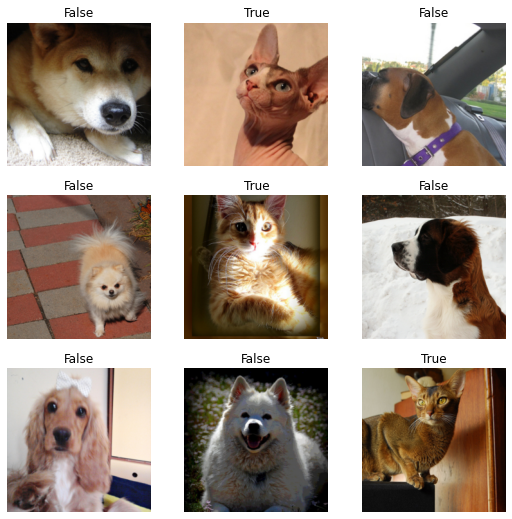

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224)) #Each image is of size 224x224 pixels, since in order to put the data in a tensor, they mst of uniform shape
dls.show_batch()

`dls` is nothing but a tuple of the *train_dl* and the *valid_dl*, that we used in the last lab session. So if we simply deconstruct this variable called `dls` as

In [ ]:
train_dl,valid_dl = dls

We reach the same point!

Next, we create a *Learner*, which is nothing but a python class, similar to the `NeuralNetwork` class in the previous session. Its job is to simply keep track of the data, model, optimizer, and the state of the parameters. We can train the model using the `fine_tune` method of the class.

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1) #Make sure your GPU is enabled, otherwise this may take an hour or so

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.137318,0.197616,0.936401,00:46


epoch,train_loss,valid_loss,accuracy,time
0,0.044626,0.077661,0.971583,00:49


Wow, In less than 2 mins, we have built a model that is about 98% accurate in classifying dogs from cats. If you set the hyperparameters of this model carefully, you may achieve even more. 

We have not been able to achieve this kind of accuracy in any of the previously built dataset. This is the current State of Computer Vision, and as you can see, there are great tools out there, like the fastai library, which bring all these wonders to your fingertips. And in return you don't have to spend years and years on learning the math, or the theory. You can build your own world class models with minimal effort. 


Infact, let us build our own classifier!

I very recently came across [this](https://joedockrill.github.io/jmd_imagescraper/) tool developed by someone, which easily lets us build our own datasets by scraping images from the Internet. It works using a simple duckduckgo based search engine, which lets it downlaod images using a search query. So using this, you can create a dataset of images easily.

In [ ]:
!pip install jmd_imagescraper >./tmp
from jmd_imagescraper.core import *

Build your own Image Classifier, not necessarily only 2 classes.



In the below example, we pick a random, but slighlty harder problem - classifying between 2 very similar monuments - the *India Gate*, in New Delhi, and the *Arc De Triomphe*, in Paris. Infact, India Gate was inspired by Arc De Triomphe, and actually look quite similar, atleast from a distance. Can a Convolutional Neural Network identify which one is which?

You can change the queries to anything else. Duck Vs Goose, Mickey Mouse vs Tom the cat, Horse vs Donkey. There can even be more than 2 classes, not an issue. Try building your own Image Classifier.

In [ ]:
root = Path().cwd()/"monuments/"
duckduckgo_search(root, "India Gate", "India Gate", max_results=100);
duckduckgo_search(root, "Arc de Triomphe", "Arc de Triomphe", max_results=100);

Duckduckgo search: India Gate


Exception occured while retrieving https://tse4.mm.bing.net/th?id=OIP.PLvdabJ1187nvOQNKmIAZgHaHa&pid=Api
Duckduckgo search: Arc de Triomphe


In [ ]:
files = get_image_files(root)
files

(#599) [Path('/content/monuments/Arc de Triomphe/167_16031700.jpg'),Path('/content/monuments/Arc de Triomphe/274_4f85020a.jpg'),Path('/content/monuments/Arc de Triomphe/277_55918e55.jpg'),Path('/content/monuments/Arc de Triomphe/163_b42c842a.jpg'),Path('/content/monuments/Arc de Triomphe/092_0c194d5b.jpg'),Path('/content/monuments/Arc de Triomphe/023_c5c92271.jpg'),Path('/content/monuments/Arc de Triomphe/106_0890cd6f.jpg'),Path('/content/monuments/Arc de Triomphe/271_546bdf3a.jpg'),Path('/content/monuments/Arc de Triomphe/226_ce7bfaa4.jpg'),Path('/content/monuments/Arc de Triomphe/018_6022972b.jpg')...]

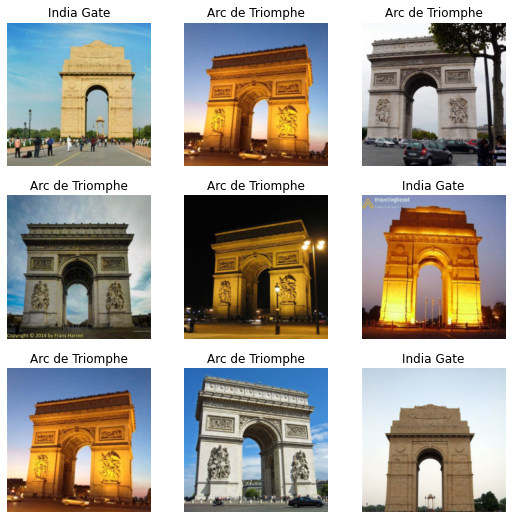

In [ ]:
dls = ImageDataLoaders.from_path_func(path,files,label_func=parent_label,item_tfms=Resize(224))
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.795409,0.113256,0.983193,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.131101,0.111984,0.932773,00:04
1,0.069112,0.086834,0.974790,00:04
2,0.045563,0.127551,0.957983,00:04
3,0.031879,0.123952,0.966387,00:04
4,0.024166,0.115350,0.966387,00:04


So In just a few lines of code, you have built your own Image classifier, with world class accuracy!

## What is a Convolutional Neural Network?

Now that we've seen the potential of Convolutional Neural Nets (CNNs). For those who have no idea about what a Convolutional Neural Net is or looks like, below is a great video to help you 


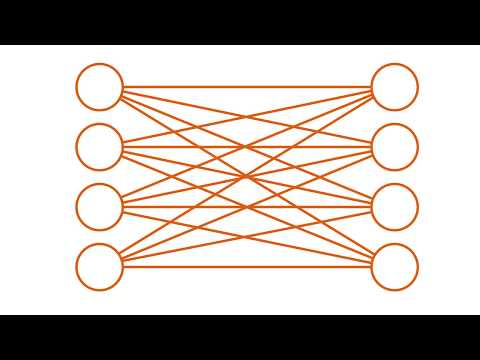

In [ ]:
YouTubeVideo('K_BHmztRTpA',700,450)


Let us learn about what they exactly are. Let us look at the represenation of the model we used above. 

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Few Observations! This is a nn.Sequential Object, which we know about. This particular model is a very famous architecture in Computer Vision, and is called the *ResNet* Architecture. We'll look into it in detail in the following subsection. 

Just like in the previous session, we learnt that models are composed of blocks called *modules*. Let us look at one of these modules.

In [ ]:
learn.model[0]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

Turns out even this module is composed of many blocks. Let us look at an even more basic block within this module.

In [ ]:
learn.model[0][0]

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

Here we have a new PyTorch object, called as the *nn.Conv2D*, which stands for the 2D Convolutional Block (since Images are 2D). This is analogous to the Linear Layer we learnt about. Except that if you look at the model, there are both Conv Blocks as well as linear blocks in this ResNet model. 

### What is a Convolutional Block? 

For that let us start by understanding what a convolution is. A convolution is a feature engineering technique, by which we derive information from an image. A specific kind of convolution may be helpful in identifying the edges of an image, the other may be helpful in identifying where the color green is present, and so on. Visually, this is how convolutions are performed.

![](https://drive.google.com/uc?id=1J92FpdbRlXnd1Mr5tZSYtMrhGZSqbeA3)

![](https://drive.google.com/uc?id=14Dbf6jLFMSVvpbjBm9KUkGNk8lEVye2f)

The 3x3 matrix you see, over which convolution takes place is called the *kernel*. Each kernel is responsible for deriving a feature. 

There may be multiple kernels working on the same image per layer. This resulting matrix (on the right) is the output of one layer, and represents some feature. This is also the input to the next layer of the convNet. The next layer will learn even more complex features, until it can reach a point, where it can learn about features that differentiate between dogs and cats, for example.

There is a great [visualization tool](https://www.cs.ryerson.ca/~aharley/vis/conv/) created by Adam Harley to visualize how CNNs process image data.

### Why does a Convolutional Network work better than MultiLayer Perceptrons?

In the real world, pixels don't really mean much. It is a *group* of pixels that has a meaning. A group of pixels forms the eyes, the nose, the ears of a cat. And a group of these groups collectively forms the face of the cat. MLPs don't consider this spatial relationship between pixels. It simply breaks them apart and treats each pixel independently. Through this we lose spatial information. But CNNs retain this spatial relationship. It works on the pronciple of finding features from a group of pixels without disturbing their spatial distribution. THis is the reason CNNs work better on visual data rather than straightforward MLP Neural Networks.

### History of CNNs

![](https://drive.google.com/uc?id=1aliUnCaqWQURkSYN5MVsm3bUBpMFjPRU)

CNNs were first popularized by Yann LeCun in 1989. At that time, however, the research community did not beleive in the potential of Neural Nets. However, Yann LeCun was one of the few researchers who did, and kept working on its development. Here is a video of him demonstrating the first ConvNet for Handwritten Digit recognition while he was at Bell Labs. 

This model of his was used by Banks to read cheques and the Post Office to read postal codes. 

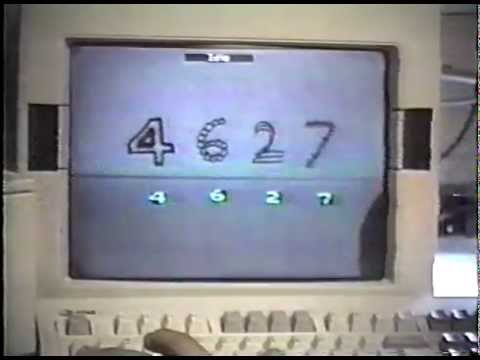

In [ ]:
YouTubeVideo('FwFduRA_L6Q',width=700,height=450)

Today, LeCun works as the Director of Facebook AI Research, which is a pioneer in many AI techniques, that is used as baseline by other researchers throughout the world to build upon their own work!

## The ResNet Architecture and other Image Classification Models

ResNets are one of the most Vanilla image classification models used for classification. They were introduced in 2015 by Kaiming He et al.
They are particulary effective due to the skip connection feature, which looks something like this. 

![](https://drive.google.com/uc?id=1TCdBQjz8qEegGfOpPi_VLQUtBACiPuYh)

This is a great regulization feature. It serves the model in two ways.

* It prevents the model from overskipping, since the data can somewhat be directed to skip over layers.
* Most importantly, it is a great way to propagate activation distributions, and prevents them from collapsing to zero mean/zero standard deviation. 

Zero Activations are a huge problem in Neural Networks. If a model is not trained carefully, the activations can collapse very fast, and at that point, there will be no learning, since the gradients will be zero too, and there will be no significant parameter update. 

This is what the ResNet architecture looks like in total.

![](https://drive.google.com/uc?id=1JD56yCUf_GoyQxy69l_jQ_hPImW6OCrd)

This Skip Connection Technique became so popular, that many modern Image architectures use this. For example, here is the EfficientNet architecture.

![](https://drive.google.com/uc?id=1-mcRP0oDyyfkqBS4cPQJPBM37nL418ie)

And the MobileNet architecture!

![](https://drive.google.com/uc?id=1_5_HT1RXCAgkfBs_Zu5NA9p5rXZG16vi)

Lets actually look inside the ResNet architecture!

ResNet architecture has many variants, based on the number of layers. There is ResNet18, ResNet34, ResNet50, ResNet101,and ResNet151. If you scroll up, you'll notice we used the ResNet34 architecture, because it falls in between the two extremes, and works satisfactorily. 

Torchvision provides us with the architectures of these models, along with *pretrained* weights. [Link](https://pytorch.org/vision/stable/models.html) for all models provided by PyTorch. 

In [ ]:
import torchvision

Here is the implementation of the resnet34 architecture. 

In [ ]:
model=torchvision.models.resnet34(pretrained=True)

Lets look up the source-code of the implementation of this model.

In [ ]:
??model

You would have noticed the argument called `pretrained`. Whats that?

### Pretrained Weights and Transfer Learning

*fastai* learner provides us with a method in its Learner class, called `summary`, which gives the summary of the model layers it contains. It provides information about each layer in the model, the number of parameters it has, as well as the input and output shape of the data that goes into the model. 

It also provides information about the total number of parameters in the model. Let us try to find the total number of parameters in the Resnet34 architecture, which is by the way, on the lower end of the complexity spectrum of models

In [ ]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      

There are 21 million parameters in the model. Turns out, it is very computationally expensive to train this model from scratch for whatever task we have (cat vs dog in our example). Most of us do not have the resources to carry out model trainings from scratch. Its very common for models to take multiple GPUs over multiple days to train a model from scratch. 

So, how did we bring down the training time from multiple days to less than 2 minutes?

*Transfer Learning* is the answer. 

The way CNNs work is, that the earlier layers of the model learn basic features, such as right edge, or the presence of a colour. As you progress deeper into the model, the model learns more complex features. Here is a great representation of this from a 2013 paper by Zeiler and Fergus.

![](https://drive.google.com/uc?id=1zvOzZbvCCP-jsZL2oj_4K30BOdBWyBEc)

The basic features are more or less common for all Image recognition tasks. For example, every image recognition task involves the model needing to identify edges, colours, basic shapes such as squares, circles, etc. It is only the later layers of the model that need to be different in order for the model to adapt for the particular problem that you're trying to solve. 

So, researchers already train these architectures on standard Image datasets (such as ImageNet, a corpus of 1.4 Million Images containing 1000 categories of everyday objects, or the COCO dataset), and provide the parameters of the model publically, so that we don't have to train them from scratch. THis is called *Transfer Learning*, and the process is called using pretrained weights (parameters).

Now, for any task, all we need to do is, to *fine-tune* the later layers of the model to adapt to our task.




## Using external models for transfer learning

There is a practitioner named [Ross Wrightman](https://github.com/rwightman), who provides PyTorch compatible ImageNet-pretrained weights for many modern architectures - even those architectures which are not present by default in PyTorch or Keras. He provides us with a [library](https://github.com/rwightman/pytorch-image-models/tree/master/timm) called `timm`, which facilitates retrieving such models. 

We would like to integrate these models with a fastai style learner. But these models are not immediately ready to go into the learner object. Thats because by default, all the layers are clubbed into a single module. To use all the functionality that fastai provides, you need to first split each layer into a separate module, and also do a few architectural changes to make it compatible with the data that you're training with (Image Net has 1000 classes, we have only 2)! 

Zach Mueller is a very active contributor to the fastai community, and created a library that contains this functionality. You can find it [here](https://walkwithfastai.com/vision.external.timm).

Our purpose here is not to learn all the technical details all at once, but rather providing you with the tools to build your own models. Many a times, you want to use other models other than standard ResNets or Inceptions, etc. Such open-source work from the AI community is a great way to learn and grow. 


In [ ]:
!pip install timm >./tmp
!pip install wwf >./tmp

In [ ]:
from wwf.vision.timm import *
import timm

These are all the models that are available in the timm library.

In [ ]:
timm.list_models(pretrained=True)

['adv_inception_v3',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dm_nfnet_f0',
 'dm_nfnet_f1',
 'dm_nfnet_f2',
 'dm_nfnet_f3',
 'dm_nfnet_f4',
 'dm_nfnet_f5',
 'dm_nfnet_f6',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn107',
 'dpn131',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnet269d',
 'ecaresnetlight',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b2a',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b3a',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_lite0',
 'ens_adv_inception_resnet_v2',
 'ese_vovnet19b_dw',
 'ese_vovnet39b',
 'fbnetc_100',
 'gernet_

Let us build a model with another architecture, say `inception_v4`. `wwf` provides us with a convenient function that takes in the model architecture, splits it into modules, and modifies the architecture according to our data input and output dimensions, and returns a fastai style learner object

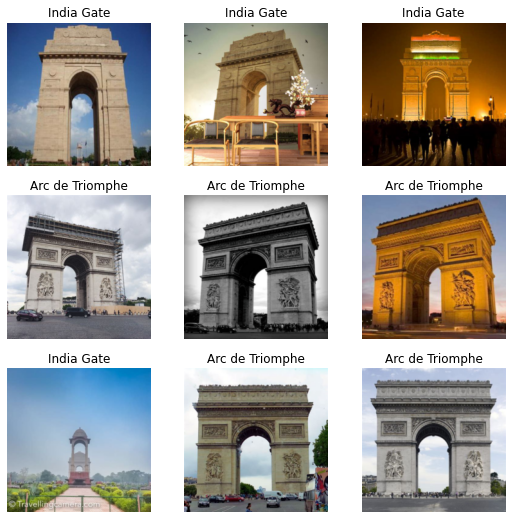

In [ ]:
dls.show_batch()

In [ ]:
learn = timm_learner(dls, 'inception_v4', metrics=accuracy)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/inceptionv4-8e4777a0.pth" to /root/.cache/torch/hub/checkpoints/inceptionv4-8e4777a0.pth


In [ ]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 111 x 111 
Conv2d                                    864        False     
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 32 x 109 x 109 
Conv2d                                    9216       False     
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 109 x 109 
Conv2d                                    18432      False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                          

Then you can simply follow the same step to train the model

In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.863879,0.492530,0.865546,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.084541,0.098243,0.957983,00:10
1,0.069047,0.091549,0.966387,00:09
2,0.050048,0.116112,0.941176,00:09
3,0.038921,0.121132,0.949580,00:09


In [ ]:
#This will be used in the exercise. This line can be used to get the final accuracy of the model
learn.recorder.values[-1][-1]

0.9495798349380493

That's it. Now you have all the tools to build your own Image Classification models. There are a few tasks that you should do before heading to the Exercises.

Finally, We would like to talk about the fastai library, which we have used extensively in this lab. The reason why we did not use PyTorch directly, was because there are way too many concepts to be learned before implementing state of the art models. It also does not make sense to implement watered down, or substandard models. One of the objectives of this course is to teach the real world Machine Learning, rather than Machine Learning from 5 or 10 years ago. Fastai is a pioneer in teaching Deep Learning in a top-down fashion - where you first learn how to implement models, and then learn the details. 

So a lot of details in this notebook that we have not convered are meant to be learnt slowly. We really recommend the fastai course to learn how to implement your own models, and also learn the theory behind a lot of techniques used in Deep Learning today. 

## Additional Tasks
### Task 1
On the dataset you built, try implementing another model from `timm`. Make sure the model is not one which starts with `tf_` or `hr` as recommended by the wwf library. Train your model on this dataset.

### Task 2
Additional Research:
Many models have modules like Dropout, BatchNorm, and Pooling. Search on Google to understand what each one of these does. It is recommended you go through the original Research papers that introduced these, or did significant study on these topics

## Exercise

Build a new dataset with 5 categories (any classification problem will work), using `duckduckgo_search`. For all models that are available with pretrained weights, and that do not start with `tf_` or `hr`, and train using `fine_tune` for 4 epochs. Plot all the accuracies on a graph with y denoting the accuracy, and x being fixed at 0. Annotate the points with the name of the architecture used, using `plt.annotate`

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
learn = timm_learner(dls, 'resnet50', metrics=accuracy)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50_ram-a26f946b.pth" to /root/.cache/torch/hub/checkpoints/resnet50_ram-a26f946b.pth


In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.628207,0.153161,0.974790,00:07


epoch,train_loss,valid_loss,accuracy,time
0,0.042372,0.060105,0.974790,00:07
1,0.056791,0.130125,0.957983,00:07
2,0.039026,0.055563,0.974790,00:07
3,0.028679,0.039064,0.983193,00:07


In [ ]:
root = Path().cwd()/"Scene/"
duckduckgo_search(root, "buildings", "buildings", max_results=50)
duckduckgo_search(root, "forest", "forest", max_results=50)
duckduckgo_search(root, "glacier", "glacier", max_results=50)
duckduckgo_search(root, "mountain", "mountain", max_results=50)
duckduckgo_search(root, "sea", "sea", max_results=50)

Duckduckgo search: buildings


Duckduckgo search: forest


Duckduckgo search: glacier


Duckduckgo search: mountain


Duckduckgo search: sea


[Path('/content/Scene/sea/001_a14bf53e.jpg'),
 Path('/content/Scene/sea/002_cecb1901.jpg'),
 Path('/content/Scene/sea/003_0cf0510f.jpg'),
 Path('/content/Scene/sea/004_48cf7718.jpg'),
 Path('/content/Scene/sea/005_782b6eeb.jpg'),
 Path('/content/Scene/sea/006_32cd0133.jpg'),
 Path('/content/Scene/sea/007_a9ac87ab.jpg'),
 Path('/content/Scene/sea/008_22f96884.jpg'),
 Path('/content/Scene/sea/009_6bdaaade.jpg'),
 Path('/content/Scene/sea/010_c632ec58.jpg'),
 Path('/content/Scene/sea/011_2f3ab18d.jpg'),
 Path('/content/Scene/sea/012_8c572963.jpg'),
 Path('/content/Scene/sea/013_a8155515.jpg'),
 Path('/content/Scene/sea/014_a06e9d31.jpg'),
 Path('/content/Scene/sea/015_f54ac4ff.jpg'),
 Path('/content/Scene/sea/016_608c16eb.jpg'),
 Path('/content/Scene/sea/017_a3155285.jpg'),
 Path('/content/Scene/sea/018_7519319b.jpg'),
 Path('/content/Scene/sea/019_3539a06a.jpg'),
 Path('/content/Scene/sea/020_7fc0bb59.jpg'),
 Path('/content/Scene/sea/021_61b2ed27.jpg'),
 Path('/content/Scene/sea/022_703c

In [ ]:
files = get_image_files(root)

In [ ]:
dls = ImageDataLoaders.from_path_func(path,files,label_func=parent_label,item_tfms=Resize(224))
dls.show_batch()

In [ ]:
models = ['efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b2a',
 'efficientnet_b3',
 'efficientnet_b3a',
 'inception_resnet_v2',
 'inception_v3',
 'inception_v4',
 'mobilenetv2_100',
 'mobilenetv2_110d',
 'mobilenetv2_120d',
 'mobilenetv2_140',
 'mobilenetv3_large_100',
 'mobilenetv3_rw',
 'regnetx_002',
 'regnetx_004',
 'regnetx_016',
 'regnetx_032',
 'vgg11',
 'vgg13',
 'resnet50d',
 'resnet101d',
 'resnet152d',
 'resnet200d',
 ]

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b0_ra-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_ra-3dd342df.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.208668,2.455770,0.220000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,1.010138,1.561977,0.440000,00:02
1,0.737585,1.051368,0.640000,00:02
2,0.597610,0.830684,0.680000,00:02
3,0.493697,0.711306,0.760000,00:02


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b1-533bc792.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1-533bc792.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.722966,2.518290,0.300000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,1.174858,1.725284,0.480000,00:03
1,0.882972,1.217750,0.600000,00:03
2,0.689106,0.967878,0.700000,00:03
3,0.556528,0.839729,0.780000,00:03


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b2_ra-bcdf34b7.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_ra-bcdf34b7.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.670288,3.200948,0.240000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,1.102082,2.149628,0.520000,00:03
1,0.901732,1.620002,0.620000,00:03
2,0.696339,1.333861,0.700000,00:03
3,0.593395,1.037224,0.720000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,2.476992,2.978936,0.360000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,1.258622,1.831597,0.480000,00:03
1,0.996723,1.127160,0.620000,00:03
2,0.757707,0.911203,0.740000,00:03
3,0.597901,0.782995,0.800000,00:03


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b3_ra2-cf984f9c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_ra2-cf984f9c.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.641109,2.126304,0.320000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.096741,1.301460,0.480000,00:04
1,0.870517,1.061739,0.640000,00:03
2,0.658830,0.963607,0.680000,00:03
3,0.556357,0.859385,0.700000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,2.635253,4.327740,0.280000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,1.018698,1.969930,0.380000,00:03
1,0.766626,1.305599,0.620000,00:03
2,0.613457,1.078308,0.720000,00:03
3,0.541880,0.877234,0.740000,00:03


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/inception_resnet_v2-940b1cd6.pth" to /root/.cache/torch/hub/checkpoints/inception_resnet_v2-940b1cd6.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.864539,3.245504,0.180000,00:07


epoch,train_loss,valid_loss,accuracy,time
0,1.146196,1.717313,0.440000,00:06
1,0.987813,0.920879,0.660000,00:05
2,0.761772,0.896883,0.700000,00:05
3,0.621433,0.908041,0.760000,00:05


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.657533,1.610088,0.460000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.854781,1.128145,0.620000,00:03
1,0.728937,1.044700,0.600000,00:03
2,0.580711,1.037807,0.640000,00:03
3,0.478396,0.945562,0.680000,00:03


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/inceptionv4-8e4777a0.pth" to /root/.cache/torch/hub/checkpoints/inceptionv4-8e4777a0.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.476985,2.185704,0.320000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.295412,1.450349,0.500000,00:05
1,0.983480,0.903504,0.660000,00:04
2,0.754912,0.644786,0.780000,00:04
3,0.603092,0.559446,0.840000,00:04


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv2_100_ra-b33bc2c4.pth" to /root/.cache/torch/hub/checkpoints/mobilenetv2_100_ra-b33bc2c4.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.510688,1.892930,0.420000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,1.024915,1.186415,0.600000,00:02
1,0.862342,0.785163,0.640000,00:02
2,0.734160,0.620065,0.800000,00:02
3,0.606622,0.552991,0.860000,00:02


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv2_110d_ra-77090ade.pth" to /root/.cache/torch/hub/checkpoints/mobilenetv2_110d_ra-77090ade.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.764747,2.014179,0.320000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,1.236433,1.386565,0.520000,00:02
1,0.984288,1.030493,0.660000,00:02
2,0.771174,0.942800,0.680000,00:02
3,0.620973,0.898445,0.660000,00:02


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv2_120d_ra-5987e2ed.pth" to /root/.cache/torch/hub/checkpoints/mobilenetv2_120d_ra-5987e2ed.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.429607,1.629814,0.460000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,1.137787,0.918099,0.640000,00:03
1,0.960140,0.689830,0.760000,00:03
2,0.715337,0.670563,0.700000,00:03
3,0.582480,0.648191,0.760000,00:03


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv2_140_ra-21a4e913.pth" to /root/.cache/torch/hub/checkpoints/mobilenetv2_140_ra-21a4e913.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.515738,2.072952,0.380000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.784747,1.095637,0.600000,00:02
1,0.578622,0.674473,0.740000,00:02
2,0.465267,0.512781,0.820000,00:02
3,0.382304,0.521783,0.840000,00:02


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv3_large_100_ra-f55367f5.pth" to /root/.cache/torch/hub/checkpoints/mobilenetv3_large_100_ra-f55367f5.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.534549,1.194359,0.560000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,1.190496,0.884420,0.740000,00:02
1,0.879812,0.718860,0.760000,00:02
2,0.727569,0.670826,0.800000,00:02
3,0.601234,0.639355,0.780000,00:02


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv3_100-35495452.pth" to /root/.cache/torch/hub/checkpoints/mobilenetv3_100-35495452.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.909816,1.854664,0.340000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,1.153886,1.193387,0.540000,00:02
1,0.928458,0.864325,0.680000,00:02
2,0.737344,0.748962,0.720000,00:02
3,0.628615,0.678460,0.720000,00:02


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-regnet/regnetx_002-e7e85e5c.pth" to /root/.cache/torch/hub/checkpoints/regnetx_002-e7e85e5c.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.678978,3.308234,0.200000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,1.728941,2.004207,0.340000,00:02
1,1.533977,1.175163,0.620000,00:02
2,1.323803,0.856371,0.700000,00:02
3,1.106105,0.739030,0.700000,00:02


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-regnet/regnetx_004-7d0e9424.pth" to /root/.cache/torch/hub/checkpoints/regnetx_004-7d0e9424.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.496266,2.915446,0.240000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,1.697355,1.977500,0.380000,00:02
1,1.596774,1.325764,0.480000,00:02
2,1.357893,0.958732,0.660000,00:02
3,1.173059,0.804365,0.680000,00:02


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-regnet/regnetx_016-65ca972a.pth" to /root/.cache/torch/hub/checkpoints/regnetx_016-65ca972a.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.950127,2.567751,0.200000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,1.322488,1.381428,0.440000,00:03
1,0.984986,0.911156,0.700000,00:03
2,0.789266,0.731133,0.780000,00:03
3,0.630370,0.633440,0.820000,00:03


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-regnet/regnetx_032-ed0c7f7e.pth" to /root/.cache/torch/hub/checkpoints/regnetx_032-ed0c7f7e.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.578105,2.126131,0.280000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,1.052561,1.186364,0.520000,00:04
1,0.854906,0.935534,0.700000,00:03
2,0.668748,0.787326,0.700000,00:03
3,0.555297,0.672409,0.740000,00:03


Downloading: "https://download.pytorch.org/models/vgg11-bbd30ac9.pth" to /root/.cache/torch/hub/checkpoints/vgg11-bbd30ac9.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.967110,0.657418,0.760000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.473852,0.704408,0.760000,00:09
1,0.350210,0.813435,0.720000,00:04
2,0.301486,0.617534,0.780000,00:04
3,0.250064,0.592533,0.780000,00:04


Downloading: "https://download.pytorch.org/models/vgg13-c768596a.pth" to /root/.cache/torch/hub/checkpoints/vgg13-c768596a.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.913718,0.678305,0.720000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.628099,0.614579,0.740000,00:08
1,0.437015,0.698585,0.740000,00:05
2,0.339270,0.610108,0.740000,00:05
3,0.269896,0.594637,0.740000,00:05


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to /root/.cache/torch/hub/checkpoints/resnet50d_ra2-464e36ba.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.474486,1.493304,0.460000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.792184,0.953400,0.640000,00:04
1,0.598653,0.734129,0.760000,00:04
2,0.463336,0.674540,0.780000,00:04
3,0.379255,0.596491,0.800000,00:03


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet101d_ra2-2803ffab.pth" to /root/.cache/torch/hub/checkpoints/resnet101d_ra2-2803ffab.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.593636,0.970375,0.620000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.997591,0.663815,0.740000,00:05
1,0.811104,0.484645,0.840000,00:05
2,0.623108,0.462299,0.880000,00:05
3,0.501685,0.523460,0.840000,00:05


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet152d_ra2-5cac0439.pth" to /root/.cache/torch/hub/checkpoints/resnet152d_ra2-5cac0439.pth


epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored

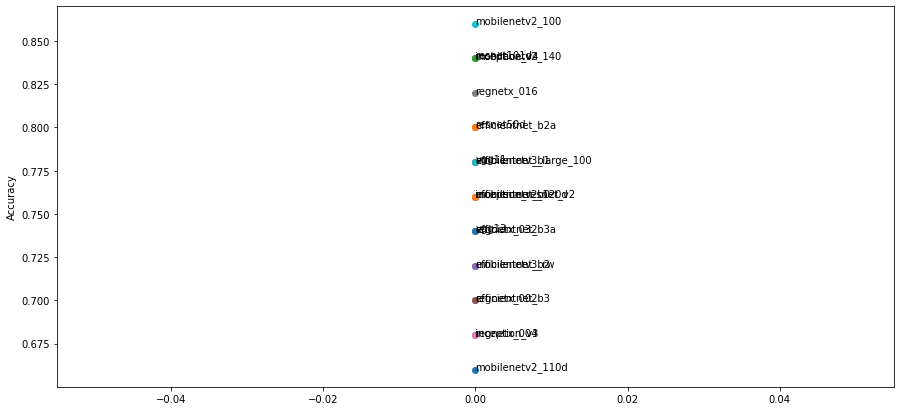

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(len(models)-1):
  torch.cuda.empty_cache()
  learn = timm_learner(dls, models[i], metrics=accuracy)
  learn.fine_tune(4)
  plt.plot(learn.recorder.values[-1][-1], marker='o')
  plt.annotate(models[i],(0, learn.recorder.values[-1][-1]), horizontalalignment='left')
  plt.ylabel('Accuracy')

In [ ]:
for i in range(len(models)-1, len(models)):
  torch.cuda.empty_cache()
  learn = timm_learner(dls, models[i], metrics=accuracy)
  learn.fine_tune(4)
  plt.plot(learn.recorder.values[-1][-1], marker='o')
  plt.annotate(models[i],(0, learn.recorder.values[-1][-1]), horizontalalignment='left')
  plt.ylabel('Accuracy')

In [ ]:
plt.show()